In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products1.csv')

In [3]:
#Summary of the data
sales.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sale_ID            413 non-null    object
 1   customer_ID        413 non-null    object
 2   product_ID         413 non-null    object
 3   date_of_purchase   413 non-null    object
 4   unit Price         413 non-null    int64 
 5   quantity           413 non-null    int64 
 6   total_price        413 non-null    int64 
 7   profit             413 non-null    int64 
 8   customer_location  413 non-null    object
dtypes: int64(4), object(5)
memory usage: 29.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_ID     11 non-null     object
 1   product_name   11 non-null     object
 2   product_type   11 non-null     object
 3   sellin

In [4]:
#Checking for duplicates
sales.duplicated().sum()
products.duplicated().sum()

0

In [5]:
#Checking foR null in sales CSV
sales.isnull().sum()

sale_ID              0
customer_ID          0
product_ID           0
date_of_purchase     0
unit Price           0
quantity             0
total_price          0
profit               0
customer_location    0
dtype: int64

In [6]:
#Checking for null in products CSV
products.isnull().sum()

product_ID       0
product_name     0
product_type     0
selling_price    0
buying_price     0
dtype: int64

In [7]:
#Describes the data statistics
sales.describe()
products.describe()

,selling_price,buying_price
count,11.000000,11.00000
mean,2727.272727,1909.00000
std,1254.664026,878.37862
min,1200.000000,840.00000
25%,1500.000000,1050.00000
50%,2500.000000,1750.00000
75%,3650.000000,2555.00000
max,4500.000000,3150.00000


In [8]:
#merging the two csvs

merged_data = pd.merge(sales, products, on="product_ID", how = "outer")
merged_data.drop(columns=['buying_price','selling_price'], inplace = True)
merged_data.head()

,sale_ID,customer_ID,product_ID,date_of_purchase,unit Price,quantity,total_price,profit,customer_location,product_name,product_type
0,S0394,C030,P001,2021-02-23,2240,1,3200,960,Mombasa,Pajama Short Set,Clothing
1,S0065,C043,P001,2021-03-03,2240,1,3200,960,Nairobi CBD,Pajama Short Set,Clothing
2,S0217,C067,P001,2021-03-15,2240,1,3200,960,Kileleshwa,Pajama Short Set,Clothing
3,S0152,C070,P001,2021-03-21,2240,1,3200,960,Westlands,Pajama Short Set,Clothing
4,S0354,C080,P001,2021-03-31,2240,1,3200,960,Ruaka,Pajama Short Set,Clothing


In [9]:
sales.head(2)

,sale_ID,customer_ID,product_ID,date_of_purchase,unit Price,quantity,total_price,profit,customer_location
0,S0271,C001,P002,2021-02-01,2660,1,3800,1140,Kenyatta Road
1,S0329,C002,P010,2021-02-01,1050,1,1500,450,Tatu City


In [10]:
#Product sold distribution

products_sold = merged_data.groupby(["product_ID","product_name"]).size().reset_index(name = "total_sold").sort_values(by="total_sold", ascending = False)
products_sold

,product_ID,product_name,total_sold
7,P008,Turtleneck Sweater,47
10,P011,Diffuser,45
3,P004,Tin Candle,43
8,P009,Cardigan,40
4,P005,Cotton Knee High Socks,39
9,P010,Chenille Throw Pillow Cover,38
1,P002,Pajama Pant Set,36
2,P003,Indoor Sherpa Hoodie,34
0,P001,Pajama Short Set,31
5,P006,Satin Robe,30


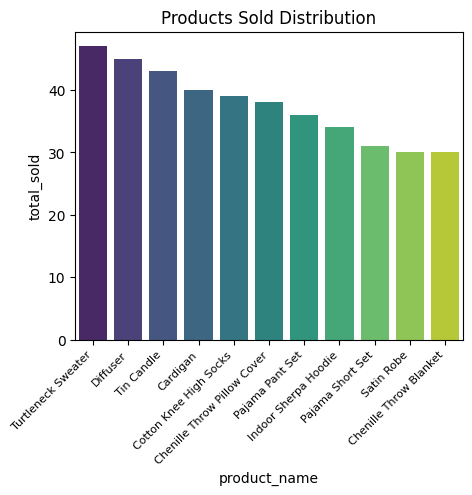

In [11]:
#product distribution bar chart

plt.figure(figsize=(5,4))
sns.barplot(x='product_name', y='total_sold', hue = 'product_name', data = products_sold, palette= 'viridis', legend= False)
plt.title('Products Sold Distribution',fontsize = 12)
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()

In [12]:
#top 10 customer locations

top_locations = merged_data.groupby(["customer_location"]).size()
top_locations = pd.DataFrame(top_locations, columns=["sales"])
top_10_locations= top_locations.sort_values(by="sales", ascending = False).head(10).reset_index()
top_10_locations


,customer_location,sales
0,Westlands,32
1,Kileleshwa,28
2,Thika,24
3,Kiambu,24
4,Nairobi CBD,23
5,Kisumu,22
6,Donholm,22
7,Kiambu Road,20
8,Karen,20
9,Muthaiga,18


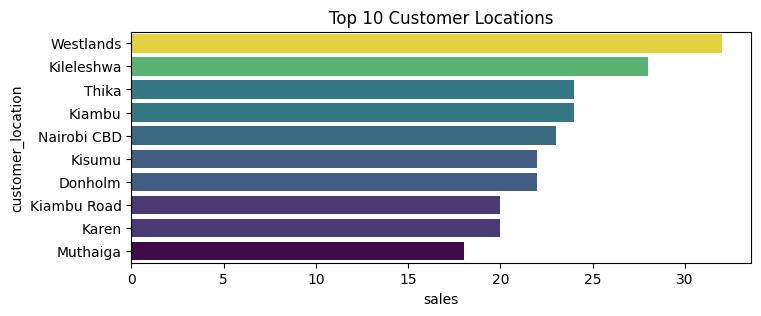

In [13]:
plt.figure(figsize=(8,3))
sns.barplot(x='sales', y='customer_location',hue = 'sales', data = top_10_locations, palette= 'viridis', legend= False)
plt.ylabel('customer_location', fontsize =10)
plt.title('Top 10 Customer Locations',fontsize = 12)

plt.show()

In [14]:
#Average amount spent by a customer per location

avg_spent = merged_data.groupby("customer_location")["total_price"].mean().round(0).reset_index()
avg_spent

,customer_location,total_price
0,Donholm,3350.0
1,Garden Estate,3424.0
2,Kahawa Sukari,3433.0
3,Karen,2825.0
4,Kenyatta Road,3056.0
5,Kiambu,3267.0
6,Kiambu Road,3510.0
7,Kileleshwa,3268.0
8,Kilimani,3364.0
9,Kisumu,3077.0


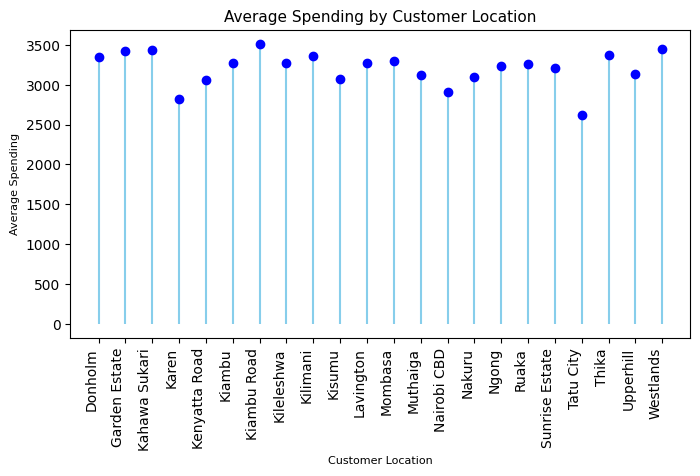

In [15]:
#Spending distribution lollipop chart

plt.figure(figsize=(8,4))
plt.stem(avg_spent["customer_location"], avg_spent["total_price"],  linefmt="skyblue", markerfmt="blue",basefmt=" ")
plt.xticks(rotation=90, ha="right")
plt.title("Average Spending by Customer Location", fontsize= 11)
plt.xlabel("Customer Location", fontsize=8)
plt.ylabel("Average Spending", fontsize=8)

plt.show()

In [16]:
# Top selling product per location
top_sold = merged_data.groupby(["customer_location", "product_name"]).size().reset_index(name="total_sold")
top_seller = top_sold.loc[top_sold.groupby(["customer_location"])["total_sold"].idxmax()].sort_values(
    by="total_sold", ascending = False).reset_index(drop=True)
top_seller

,customer_location,product_name,total_sold
0,Kileleshwa,Pajama Pant Set,6
1,Westlands,Cotton Knee High Socks,5
2,Kilimani,Cardigan,5
3,Nairobi CBD,Tin Candle,5
4,Kiambu,Diffuser,5
5,Kiambu Road,Cardigan,5
6,Thika,Diffuser,4
7,Ngong,Turtleneck Sweater,4
8,Donholm,Diffuser,4
9,Kenyatta Road,Pajama Pant Set,4


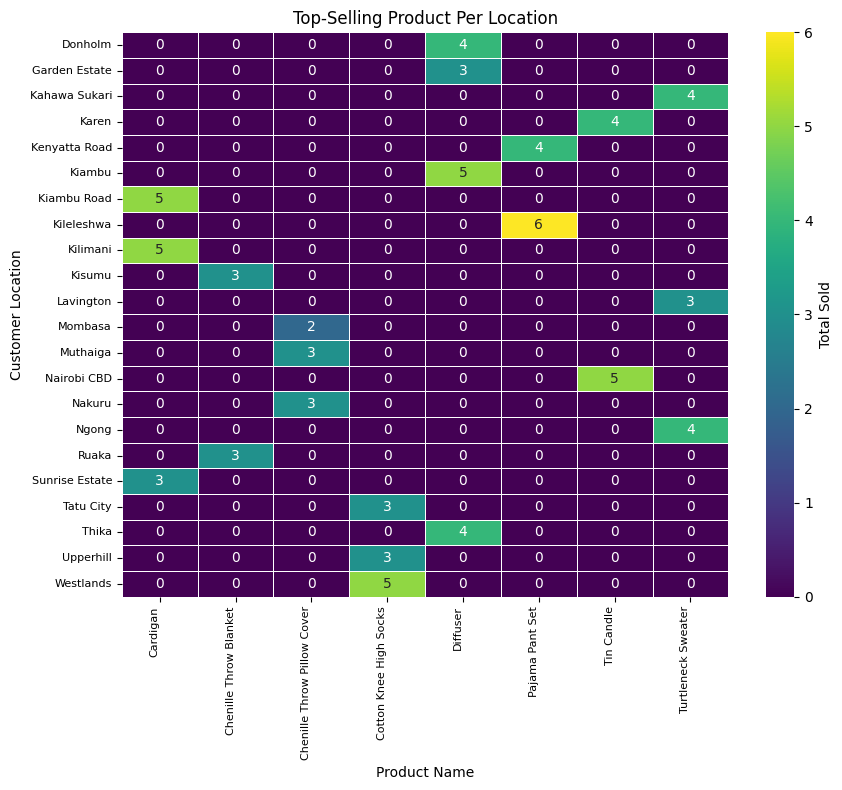

In [17]:
# Top selling product per location heatmap Visualization

pivot_top_seller = top_seller.pivot(index="customer_location", columns="product_name", values="total_sold").fillna(0)
plt.figure(figsize=(9, 8))

sns.heatmap(pivot_top_seller,annot=True,fmt=".0f", cmap="viridis", linewidths=0.5, cbar_kws={'label': 'Total Sold'})
plt.title("Top-Selling Product Per Location", fontsize=12)
plt.xlabel("Product Name", fontsize=10)
plt.ylabel("Customer Location", fontsize=10)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.show()

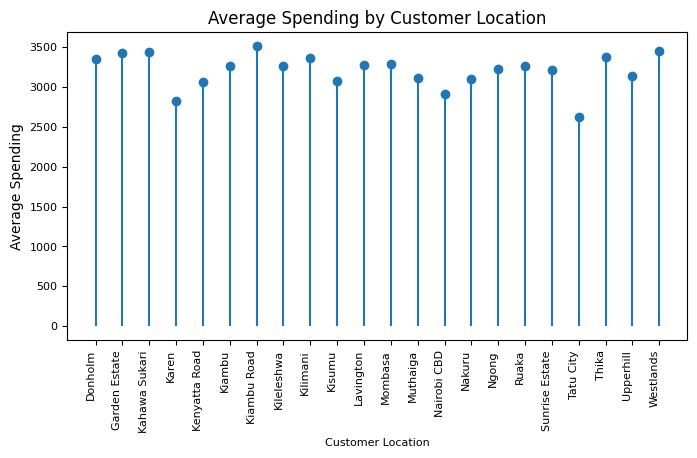

In [18]:
#Average spending by location lollipop chart

plt.figure(figsize=(8, 4))
plt.stem(avg_spent["customer_location"], avg_spent["total_price"], basefmt=" ")
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Average Spending by Customer Location", fontsize = 12)
plt.xlabel("Customer Location", fontsize =8)
plt.ylabel("Average Spending")

plt.show()

In [19]:
#product category distribution

category_dist = merged_data["product_type"].value_counts().reset_index(name = "total_sold")
category_dist

,product_type,total_sold
0,Clothing,257
1,Decor,68
2,Home Fragrance,45
3,Candle,43


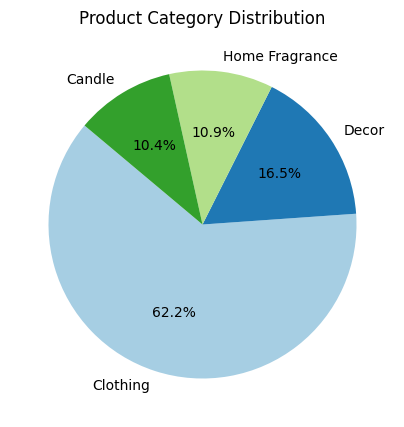

In [20]:
# Product category distribution pie chart

plt.figure(figsize=(5,5))
plt.pie(category_dist['total_sold'], labels=category_dist['product_type'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Product Category Distribution',fontsize=12)

plt.show()

In [21]:
merged_data.to_csv('thecosyshoppythonproject.csv', index= False)